In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maternal-health-and-high-risk-pregnancy-dataset/Dataset - Updated.csv


In [2]:
df =  pd.read_csv("/kaggle/input/maternal-health-and-high-risk-pregnancy-dataset/Dataset - Updated.csv")

In [3]:
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [4]:
df.describe()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
count,1205.000000,1200.000000,1201.000000,1203.000000,1205.000000,1187.000000,1203.000000,1203.000000,1205.000000,1205.00000,1203.000000
mean,27.482988,116.819167,77.166528,7.501064,98.395851,23.315080,0.175395,0.288446,0.117842,0.33444,75.817124
std,9.196765,18.715502,14.305148,3.049522,1.088363,3.875682,0.380463,0.453228,0.322555,0.47199,7.227338
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.450000,0.000000,0.000000,0.000000,0.00000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.00000,76.000000
75%,31.000000,130.000000,90.000000,7.900000,98.000000,25.000000,0.000000,1.000000,0.000000,1.00000,80.000000
max,65.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.00000,92.000000


In [5]:
df.shape

(1205, 12)

In [6]:
df.isnull().sum()

Age                        0
Systolic BP                5
Diastolic                  4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
dtype: int64

In [7]:
df = df.dropna(subset=["Risk Level"])

In [8]:
df.isnull().sum()

Age                        0
Systolic BP                4
Diastolic                  2
BS                         1
Body Temp                  0
BMI                       14
Previous Complications     1
Preexisting Diabetes       1
Gestational Diabetes       0
Mental Health              0
Heart Rate                 1
Risk Level                 0
dtype: int64

In [9]:
cols = ['Previous Complications', 'Preexisting Diabetes']

for col in cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(0)

In [10]:
cols_missing = ['Systolic BP', 'Diastolic', 'BS', 'Heart Rate', 'BMI']
for col in cols_missing:
    df[col] = df[col].fillna(df.groupby('Risk Level')[col].transform('mean'))

In [11]:
df.isnull().sum()

Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
dtype: int64

In [12]:
df.shape

(1187, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1187 non-null   int64  
 1   Systolic BP             1187 non-null   float64
 2   Diastolic               1187 non-null   float64
 3   BS                      1187 non-null   float64
 4   Body Temp               1187 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1187 non-null   float64
 7   Preexisting Diabetes    1187 non-null   float64
 8   Gestational Diabetes    1187 non-null   int64  
 9   Mental Health           1187 non-null   int64  
 10  Heart Rate              1187 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 120.6+ KB


In [14]:
cat_col = ['Previous Complications', 'Preexisting Diabetes','Gestational Diabetes','Mental Health','Risk Level']
num_col = ['Age','Systolic BP','Diastolic','BS','Body Temp','BMI','Heart Rate']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

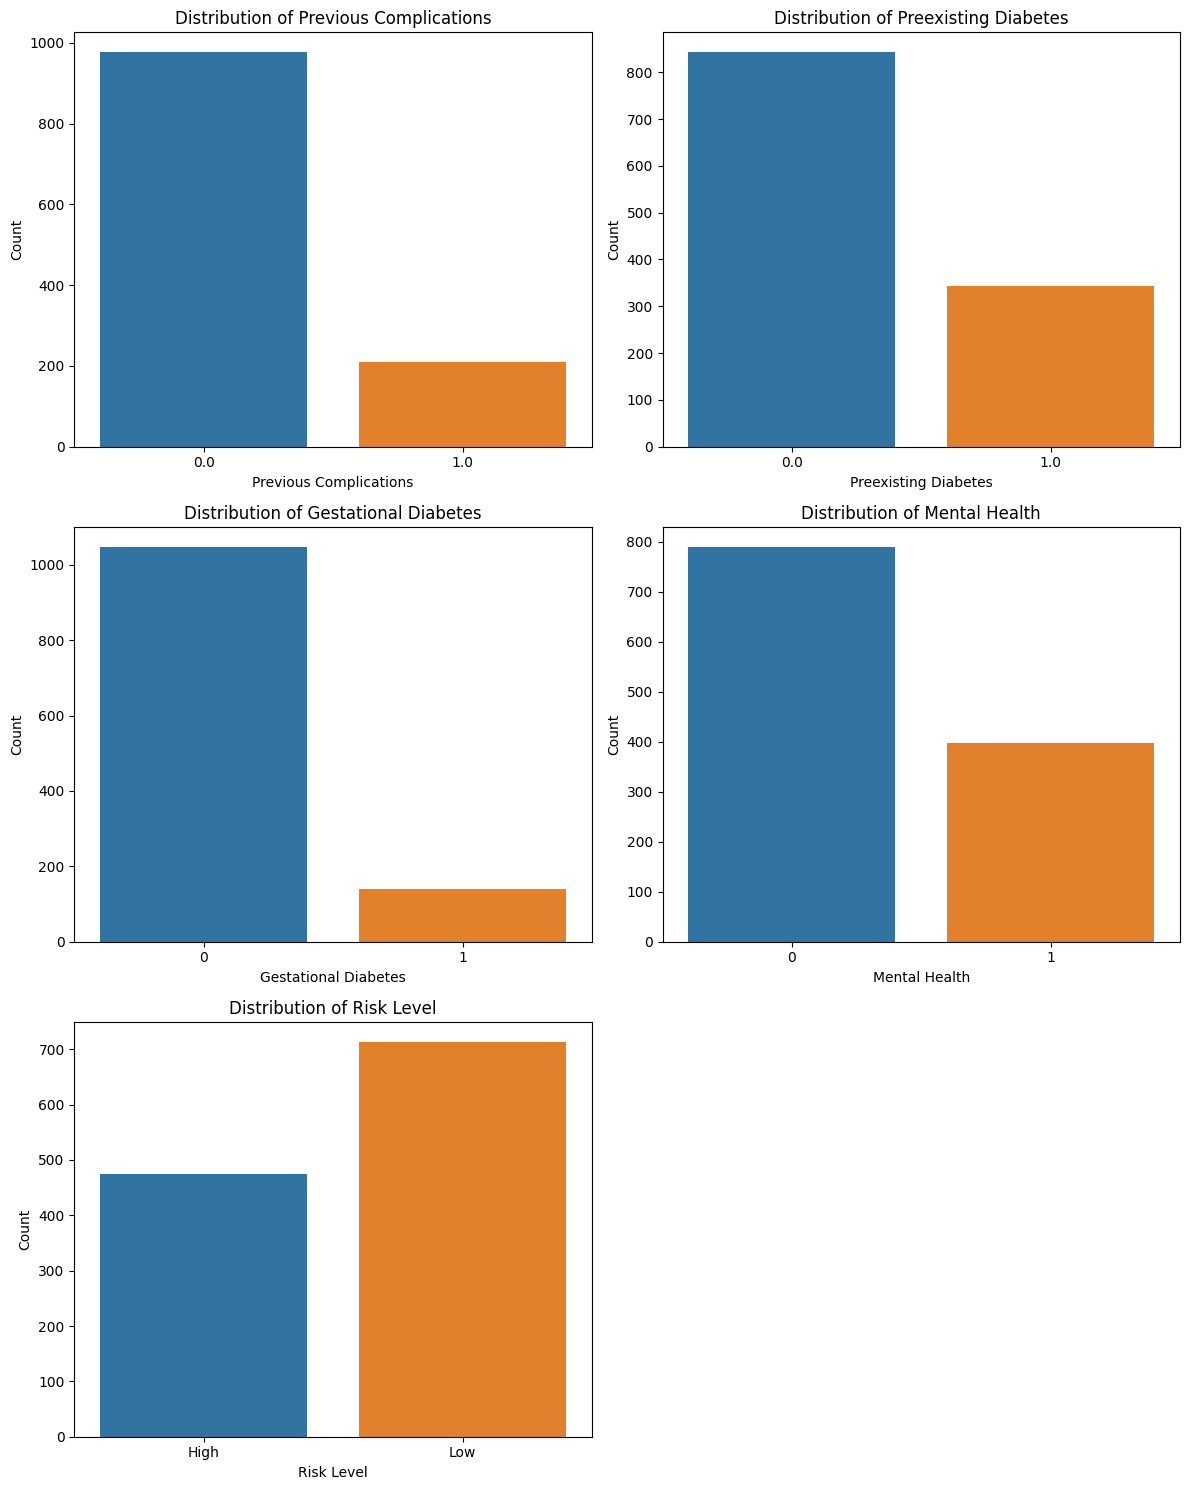

In [16]:
n_cols = 2
n_rows = (len(cat_col) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

axes = axes.flatten()

for idx, col in enumerate(cat_col):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

for i in range(len(cat_col), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

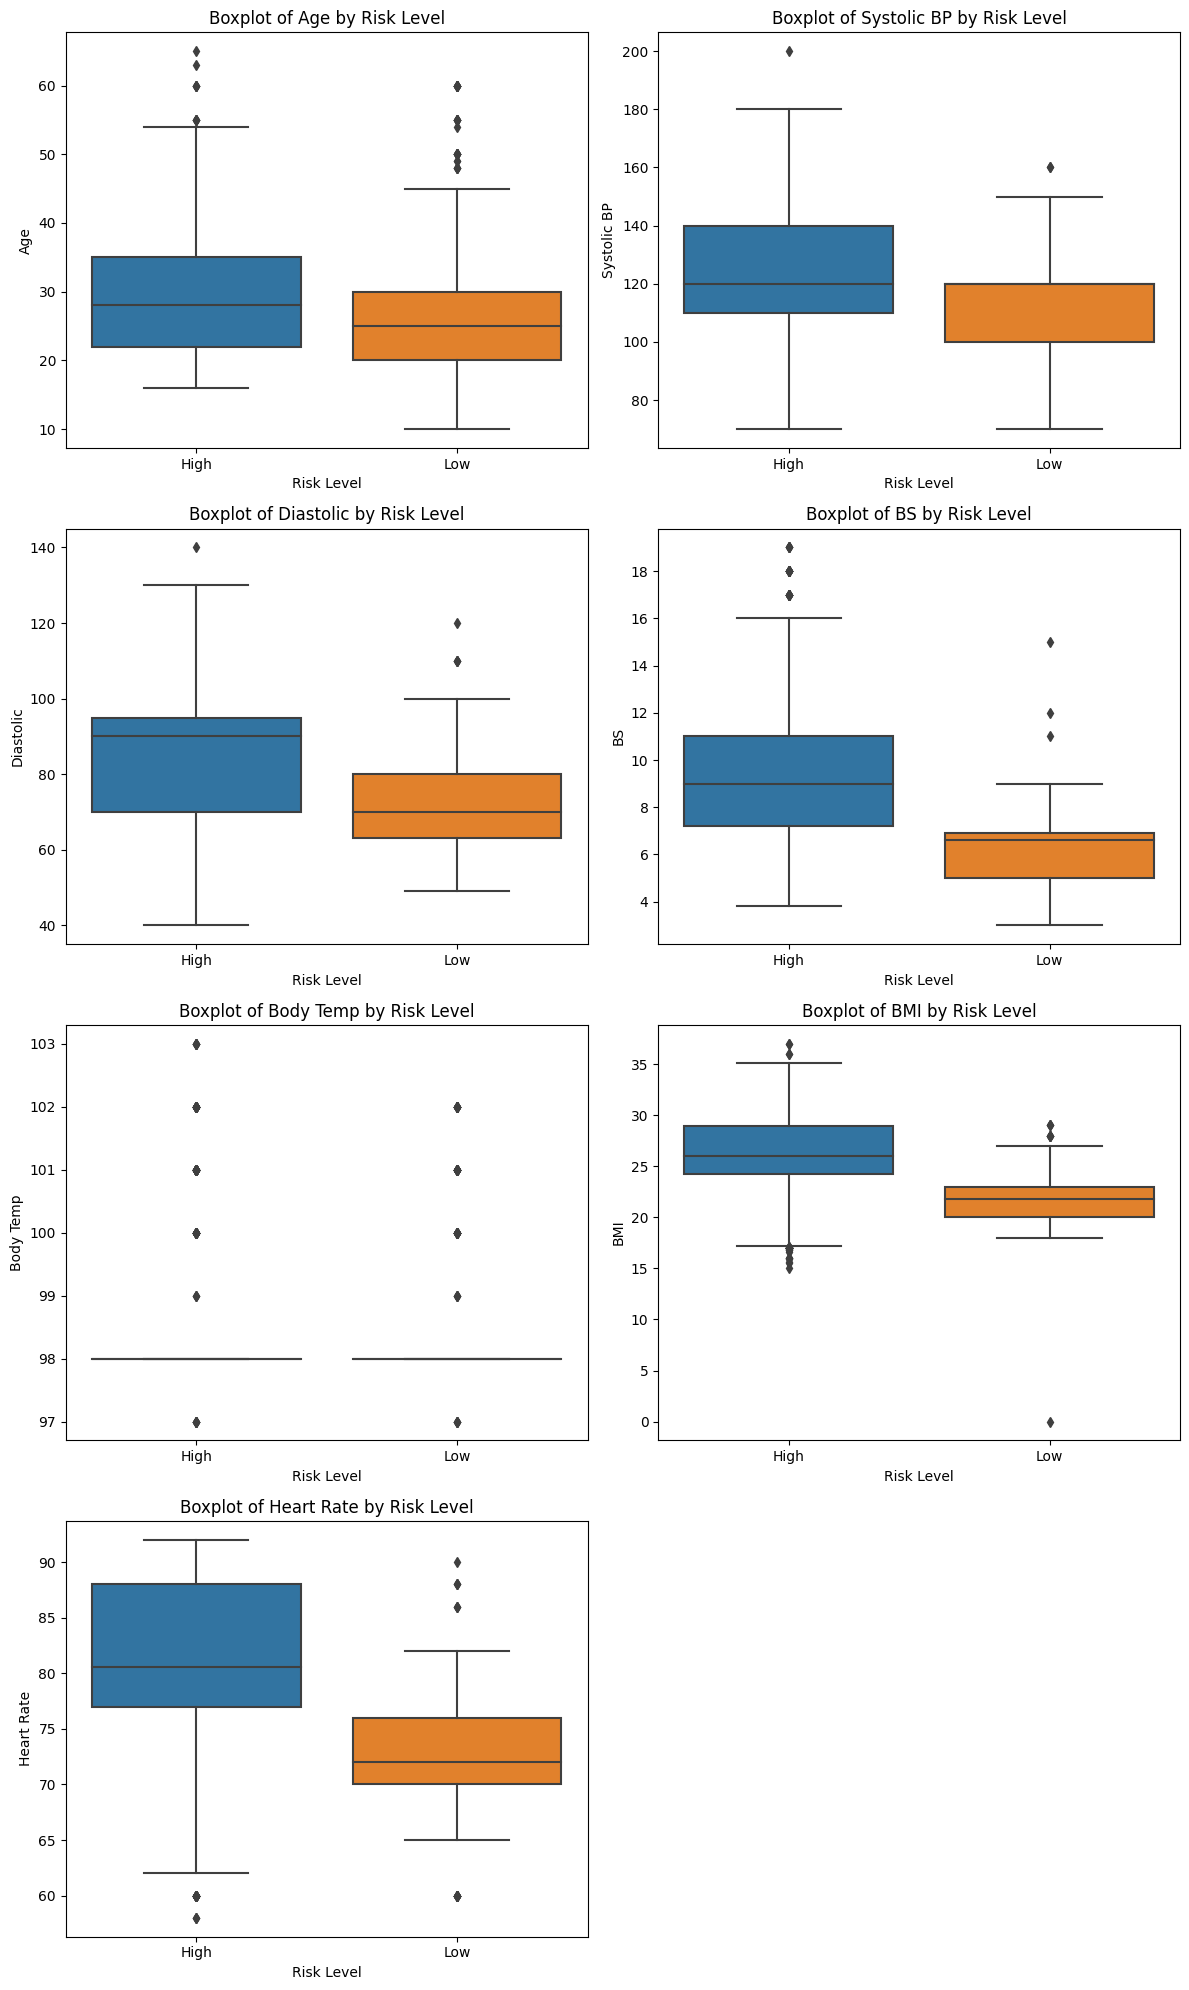

In [17]:
n_cols = 2
n_rows = (len(num_col) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(num_col):
    sns.boxplot(x='Risk Level', y=col, data=df, ax=axes[idx])  # <-- assign subplot axis here
    axes[idx].set_title(f'Boxplot of {col} by Risk Level')
    axes[idx].set_xlabel('Risk Level')
    axes[idx].set_ylabel(col)

# Remove extra empty axes if any
for i in range(len(num_col), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

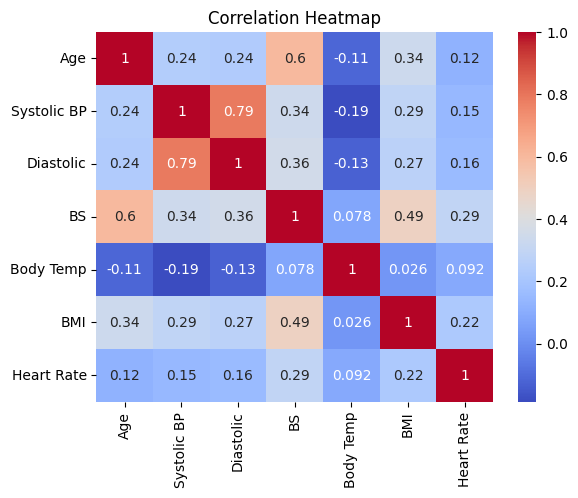

In [18]:
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [20]:
X = df.drop('Risk Level', axis=1)
le = LabelEncoder()
y = le.fit_transform(df['Risk Level'])

In [21]:
print(y)

[0 1 1 ... 0 0 0]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
knn = KNeighborsClassifier(n_neighbors=2)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
y_train_pred = knn.predict(X_train)

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nAccuracy Score:", accuracy_score(y_train, y_train_pred))

Confusion Matrix:
 [[379   0]
 [ 16 554]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       379
           1       1.00      0.97      0.99       570

    accuracy                           0.98       949
   macro avg       0.98      0.99      0.98       949
weighted avg       0.98      0.98      0.98       949


Accuracy Score: 0.9831401475237092


In [26]:
y_pred = knn.predict(X_test)

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 92   3]
 [  1 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        95
           1       0.98      0.99      0.99       143

    accuracy                           0.98       238
   macro avg       0.98      0.98      0.98       238
weighted avg       0.98      0.98      0.98       238


Accuracy Score: 0.9831932773109243


In [27]:
df.columns

Index(['Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI',
       'Previous Complications', 'Preexisting Diabetes',
       'Gestational Diabetes', 'Mental Health', 'Heart Rate', 'Risk Level'],
      dtype='object')

In [28]:
new_data = pd.DataFrame({
    'Age': [18],
    'Systolic BP': [110],
    'Diastolic': [70],
    'BS': [7],
    'Body Temp': [98],
    'BMI': [19],
    'Previous Complications': [0],
    'Preexisting Diabetes': [1],
    'Gestational Diabetes': [0],
    'Mental Health': [1],
    'Heart Rate': [76],   
})

data = scaler.transform(new_data)

prediction = knn.predict(data)

print(prediction) 


print(f'Predicted Risk Level: {"High Risk" if prediction[0]==0 else "Low Risk"}')


[1]
Predicted Risk Level: Low Risk
